In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from sklearn.neural_network import MLPRegressor

**Base de dados**

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(
    '../data/house/housing.csv', sep = ',',
    encoding = 'iso-8859-1'
)

# Exploração e tratamento dos dados #
**Atributos Previsores**

<span style="font-size: 13px; font-family: 'Trebuchet MS', sans-serif;">
- RM: é o número médio de cômodos entre os imóveis no bairro. </br>

- LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa".

- PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.
</span>

**Variável alvo**

- MEDV: valor médio das casas

## Analise de atributos e tipos ##

**Valores missing**

In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos**

In [5]:
df.shape

(2340, 4)

In [6]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,2340.000000,2340.000000,2340.000000,2.340000e+03
mean,6.335303,8.164996,17.729274,5.339491e+05
std,0.493287,5.993575,1.726801,1.493607e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,6.009000,3.740000,16.600000,4.326000e+05
50%,6.335000,5.250000,16.600000,5.250000e+05
75%,6.635000,11.280000,19.200000,6.468000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Análise dos outliers ##

**Número médio de cômodos por casa no bairro**

In [8]:
boxplot = px.box(df, y = "RM", width=600, height=400, boxmode='overlay', color_discrete_sequence=["hotpink"])
boxplot.show()

**Proprietários classe baixa no bairro**

In [9]:
boxplot = px.box(df, y = "LSTAT", width=600, height=400, boxmode='overlay', color_discrete_sequence=["royalblue"])
boxplot.show()

**Razão entre n. de alunos e professores no bairro**

In [10]:
boxplot = px.box(df, y = "PTRATIO", width=600, height=400, boxmode='overlay', color_discrete_sequence=["seagreen"])
boxplot.show()

**Valor médio das casas**

In [11]:
boxplot = px.box(df, y = "MEDV", width=600, height=400, boxmode='overlay', color_discrete_sequence=["blueviolet"])
boxplot.show()

## Gráficos de dispersão ##

**Número médio de cômodos por casa no bairro**

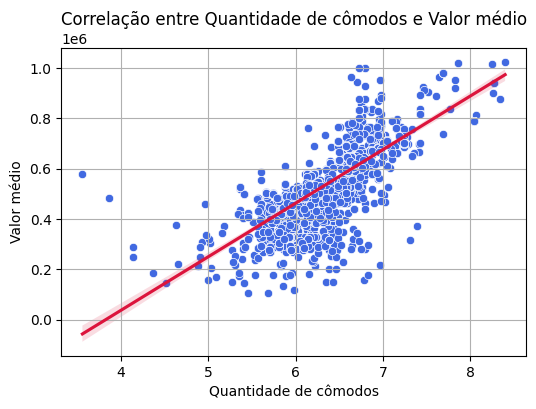

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="RM", y="MEDV", color='royalblue')

sns.regplot(data=df, x="RM", y="MEDV", scatter=False, color='crimson')

plt.title('Correlação entre Quantidade de cômodos e Valor médio')
plt.xlabel('Quantidade de cômodos')
plt.ylabel('Valor médio')
plt.grid(True)

plt.show()

**Proprietários classe baixa no bairro**

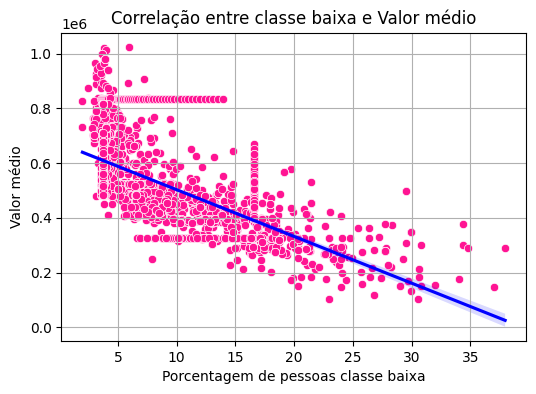

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="LSTAT", y="MEDV", color='deeppink')

sns.regplot(data=df, x="LSTAT", y="MEDV", scatter=False, color='blue')

plt.title('Correlação entre classe baixa e Valor médio')
plt.xlabel('Porcentagem de pessoas classe baixa')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

**Razão entre n. de alunos e professores no bairro**

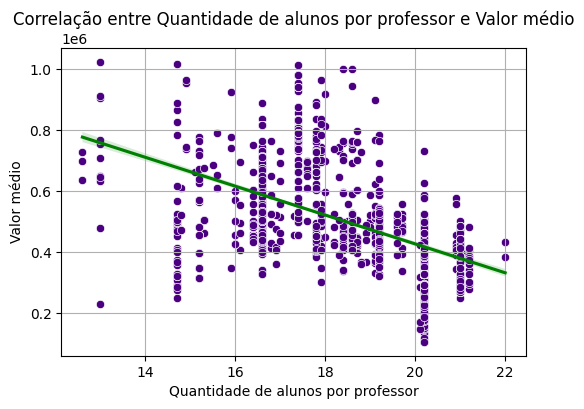

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="PTRATIO", y="MEDV", color='indigo')

sns.regplot(data=df, x="PTRATIO", y="MEDV", scatter=False, color='green')

plt.title('Correlação entre Quantidade de alunos por professor e Valor médio')
plt.xlabel('Quantidade de alunos por professor')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

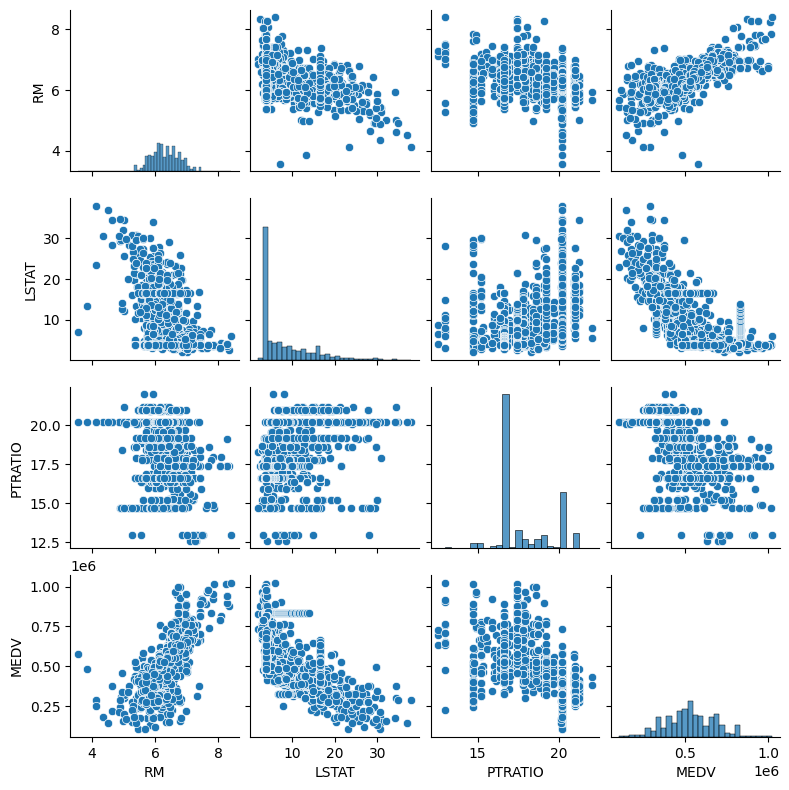

In [15]:
sns.pairplot(df, height=2);

## Análise da Normalidade ##

### Gráfico QQ-Plot ###

**Valor médio das casas no bairro**

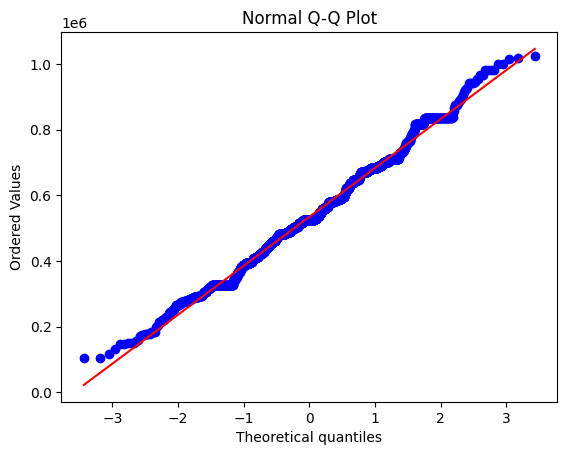

In [16]:
stats.probplot(df['MEDV'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [17]:
hist = px.histogram(df, x = "MEDV", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Média dos valores")
hist.show()

**Número médio de cômodos por casa**

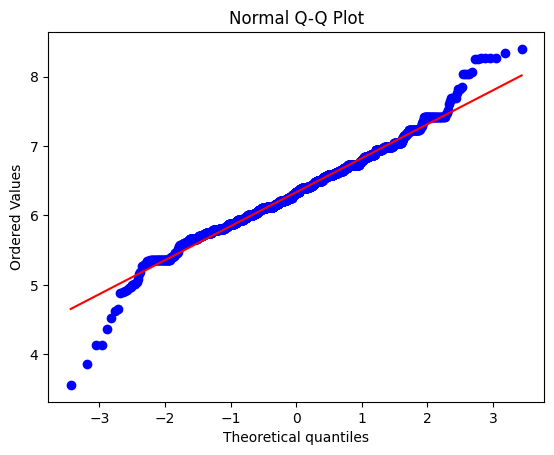

In [18]:
stats.probplot(df['RM'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [19]:
hist = px.histogram(df, x = "RM", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Cômodos por casa")
hist.show()

**Proprietários classe baixa no bairro**

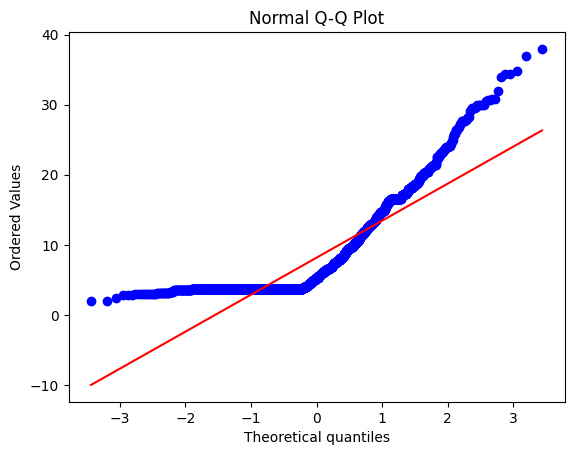

In [20]:
stats.probplot(df['LSTAT'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [21]:
hist = px.histogram(df, x = "LSTAT", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Porcentagem de pessoas classe baixa")
hist.show()

**Razão entre n. de alunos e professores no bairro**

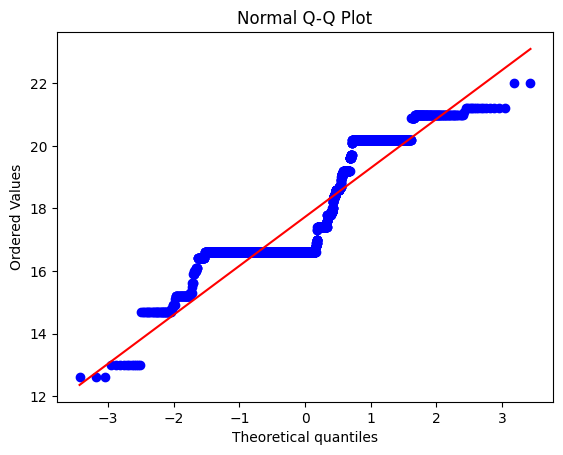

In [22]:
stats.probplot(df['PTRATIO'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [23]:
hist = px.histogram(df, x = "PTRATIO", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Quantidade de alunos por professor")
hist.show()

## Teste Estatístico ##
<span style="font-size: 14px;">

**HO = Distribuição normal:** p-valor > 0.05 </br></br>
**HA = Distribuição não normal:** p-valor < = 0.05
</span>


**MEDV**

In [24]:
estatistica, p = stats.shapiro(df.MEDV)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9928
p-valor: 2.4282e-09


In [25]:
estatistica, p = lilliefors(df.MEDV, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0585
p-valor: 1.0000e-03


**RM**

In [26]:
estatistica, p = stats.shapiro(df.RM)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9827
p-valor: 3.0274e-16


In [27]:
estatistica, p = lilliefors(df.RM, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0425
p-valor: 1.0000e-03


**LSTAT**

In [28]:
estatistica, p = stats.shapiro(df.LSTAT)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.7768
p-valor: 8.2119e-49


In [29]:
estatistica, p = lilliefors(df.LSTAT, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.2039
p-valor: 1.0000e-03


**PTRATIO**

In [30]:
estatistica, p = stats.shapiro(df.PTRATIO)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.8185
p-valor: 1.7000e-45


In [31]:
estatistica, p = lilliefors(df.PTRATIO, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.3071
p-valor: 1.0000e-03


## Correlação Linear ##

<span style="font-size: 13px;">
<li><strong>Coeficiente de Pearson </strong> -> Distribuição normal</li> </br>
<li><strong>Coeficiente de Spearman</strong> -> Distribuição <strong>não</strong> normal</li></br>
<li><strong>Coeficiente de Kendall</strong> -> Distribuição <strong>não</strong> normal</li>
</span>

**Pearson**

In [32]:
coef, p = stats.pearsonr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.70
p-valor: 0.00e+00


**Spearman** </br>

*Iremos usá-lo*

<span style="font-size: 13px;"> 
<li>Coeficiente de correlação: 0.73 -> Uma correlação de 0.73 é considerada moderadamente forte.</li> </br>
<li>p-valor: 0.00e+00O -> p-valor gerado é muito baixo e indica que há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há correlação entre as duas variáveis. 
Em outras palavras,<strong> há uma forte correlação entre as variáveis MEDV e RM.</strong> </li>
</span>

In [33]:
coef, p = stats.spearmanr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.73
p-valor: 0.00e+00


**Kendall**

In [34]:
coef, p = stats.kendalltau(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.53
p-valor: 0.00e+00


In [35]:
correlacoes = df.corr(method = 'spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.347137,-0.155367,0.731275
LSTAT,-0.347137,1.000000,0.550828,-0.698332
PTRATIO,-0.155367,0.550828,1.000000,-0.489611
MEDV,0.731275,-0.698332,-0.489611,1.000000


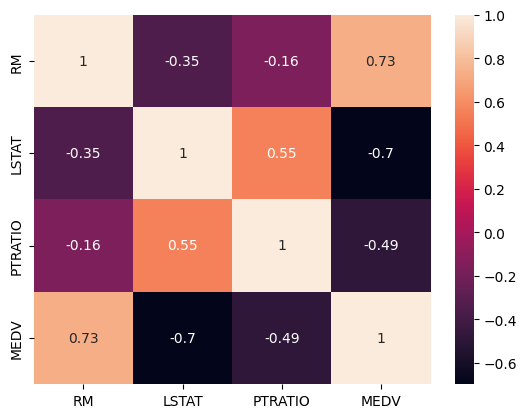

In [36]:
plt.figure()
sns.heatmap(correlacoes, annot = True);

# Tratamento das variáveis #

In [37]:
independente = df.iloc[:, 0:3].values

In [38]:
dependente = df.iloc[:, 3].values

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    independente, dependente,
    test_size = 0.3, random_state = 0
)

# Regressão com redes neurais #

<span style="font-size: 13px; font-family: 'Trebuchet MS', sans-serif;">
O MLPRegressor é uma implementação de regressão baseada em redes neurais artificiais (RNAs), que são modelos computacionais inspirados no funcionamento do cérebro humano. </br> As RNAs são compostas por neurônios artificiais interconectados, organizados em camadas, e são capazes de aprender a partir de dados.
</br>

**Parâmetros Principais**

**hidden_layer_sizes**
- Especifica o número de neurônios em cada camada oculta.
- Pode ser uma tupla que define o número de neurônios em cada camada, ou apenas um inteiro que define o número de neurônios em uma única camada oculta.

**activation**
- Função de ativação para as camadas ocultas.
- Pode ser 'identity', 'logistic', 'tanh' ou 'relu'.

**solver**
- Otimizador a ser usado para minimizar a função de perda.
- Pode ser 'adam', 'lbfgs' ou 'sgd'.

**alpha**
- Parâmetro de regularização para evitar overfitting.
- Quanto maior o valor, mais forte é a regularização.

**learning_rate**
- Taxa de aprendizagem para atualização dos pesos durante o treinamento.
- Pode ser 'constant', 'invscaling' ou 'adaptive'.

**learning_rate_init**
- Taxa de aprendizagem inicial.
- Define a taxa de aprendizagem usada na inicialização dos pesos.

**max_iter**
- Número máximo de iterações (épocas) durante o treinamento.

**tol**
- Tolerância para critério de parada.

**random_state**
- Seed usada pelo gerador de números aleatórios.

**verbose**
- Se True, mostra mensagens de progresso durante o treinamento.

**Pré-processamento dos Dados**

Antes de usar o MLPRegressor, é importante realizar o pré-processamento dos dados, incluindo normalização,</br> 
tratamento de valores ausentes e divisão do conjunto de dados em conjuntos de treinamento e teste.

**Treinamento e Avaliação do Modelo**

Após o pré-processamento, o modelo MLPRegressor pode ser treinado usando os dados de treinamento e avaliado usando métricas</br> 
de desempenho adequadas para problemas de regressão, como o erro médio quadrático (MSE) ou o coeficiente de determinação $(R²)$.

**Considerações Finais**

É importante ajustar os hiperparâmetros do modelo, como o número de camadas ocultas, o número de neurônios em cada camada e a taxa</br> 
de aprendizagem, para obter o melhor desempenho possível. Além disso, é sempre recomendável validar o modelo usando técnicas como </br>
validação cruzada para evitar overfitting e garantir que ele generalize bem para novos dados.

</span>

In [64]:
redes = MLPRegressor(
    hidden_layer_sizes = (50, 50, 50, 50), activation = 'relu',
    verbose = True, max_iter = 3000, solver = 'lbfgs',
    random_state = 12, tol = 0.0001, learning_rate = 'adaptive',
    learning_rate_init=0.001, batch_size=128,
    
)

In [65]:
redes.fit(x_train, y_train);

**Número de camadas**

In [66]:
redes.n_layers_

6

## Score

### Score de treino

In [67]:
redes.score(x_train, y_train)

0.8411037371184329

### Score de teste

In [68]:
redes.score(x_test, y_test)

0.8359006309805651

### Previsões

In [69]:
previsoes_test = redes.predict(x_test)

## Métricas

In [70]:
mean_absolute_error(y_test, previsoes_test)

42688.90118498043

In [71]:
np.sqrt(mean_squared_error(y_test, previsoes_test))

61192.892853113895